In [1]:
%reload_ext autoreload
%autoreload 2

In [3]:
from aqua.diagnostics.teleconnections import NAO, PlotNAO

In [4]:
dataset_dict = {
    'catalog': 'climatedt-phase1',
    'model': 'IFS-NEMO',
    'exp': 'historical-1990',
    'source': 'lra-r100-monthly',
}
common_dict = {
    'loglevel': 'DEBUG'
}

In [5]:
nao = NAO(**dataset_dict, **common_dict)

2025-05-02 12:18:42 :: Diagnostic :: DEBUG    -> Loading interface file: /users/nurissom/.aqua/diagnostics/teleconnections/config/teleconnections-destine.yaml


In [6]:
nao.retrieve()

2025-05-02 12:18:43 :: ConfigPath :: DEBUG    -> Updating the log_level to DEBUG
2025-05-02 12:18:43 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/nurissom/.aqua
2025-05-02 12:18:43 :: ConfigPath :: DEBUG    -> Configuration file found in /users/nurissom/.aqua/config-aqua.yaml
2025-05-02 12:18:43 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-phase1']
2025-05-02 12:18:43 :: ConfigPath :: DEBUG    -> AQUA installation found in /users/nurissom/.aqua
2025-05-02 12:18:43 :: ConfigPath :: DEBUG    -> Configuration file found in /users/nurissom/.aqua/config-aqua.yaml
2025-05-02 12:18:43 :: ConfigPath :: DEBUG    -> Available catalogs are ['climatedt-phase1']
2025-05-02 12:18:43 :: ConfigPath :: DEBUG    -> Default catalog will be climatedt-phase1
2025-05-02 12:18:43 :: ConfigPath :: DEBUG    -> Catalog file is /users/nurissom/.aqua/catalogs/climatedt-phase1/catalog.yaml
2025-05-02 12:18:43 :: ConfigPath :: DEBUG    -> Machine file is /users/nurissom/.aqua/ca

In [7]:
nao.compute_index()

2025-05-02 12:19:22 :: NAO :: DEBUG    -> Station 1: lon=334.3, lat=37.7
2025-05-02 12:19:22 :: NAO :: DEBUG    -> Station 2: lon=338, lat=64.1


2025-05-02 12:19:23 :: NAO :: DEBUG    -> Index evaluated


In [8]:
reg1 = nao.compute_regression(season='DJF')

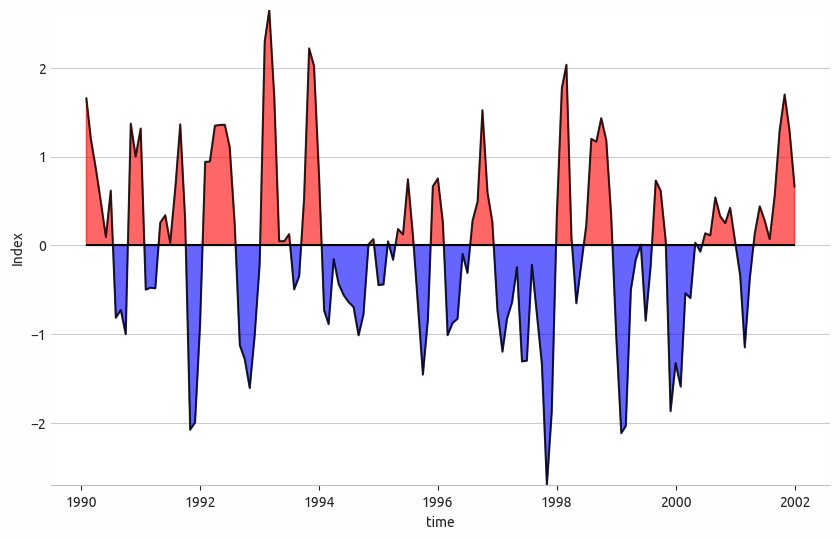

In [22]:
plot = PlotNAO(loglevel='DEBUG')
plot.plot_index([nao.index], thresh=0)

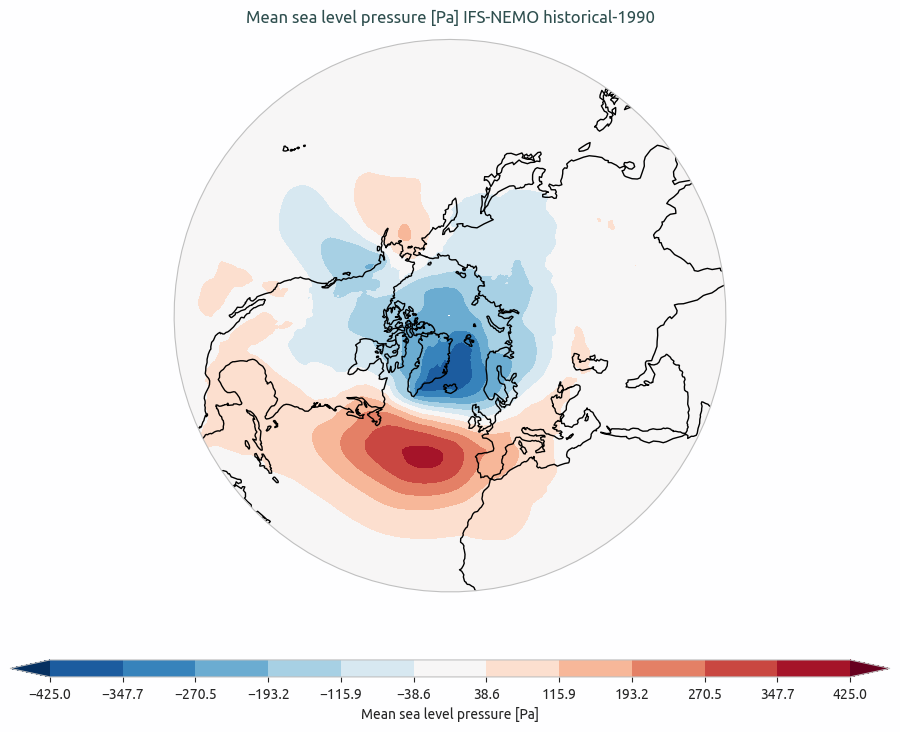

In [17]:
from cartopy.crs import NorthPolarStereo
from aqua.graphics import plot_single_map
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.path as mpath
import cartopy.crs as ccrs

proj = NorthPolarStereo(central_longitude=-20.0)

fig = plt.figure(figsize=(11, 8.5))
ax = fig.add_subplot(111, projection=proj)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.set_extent([-180, 180, 10, 90], crs=ccrs.PlateCarree())

fig, ax = plot_single_map(data=reg1,sym=True, proj=proj, fig=fig, ax=ax,#extent=[-180, 180, 10, 90],
                          return_fig=True)

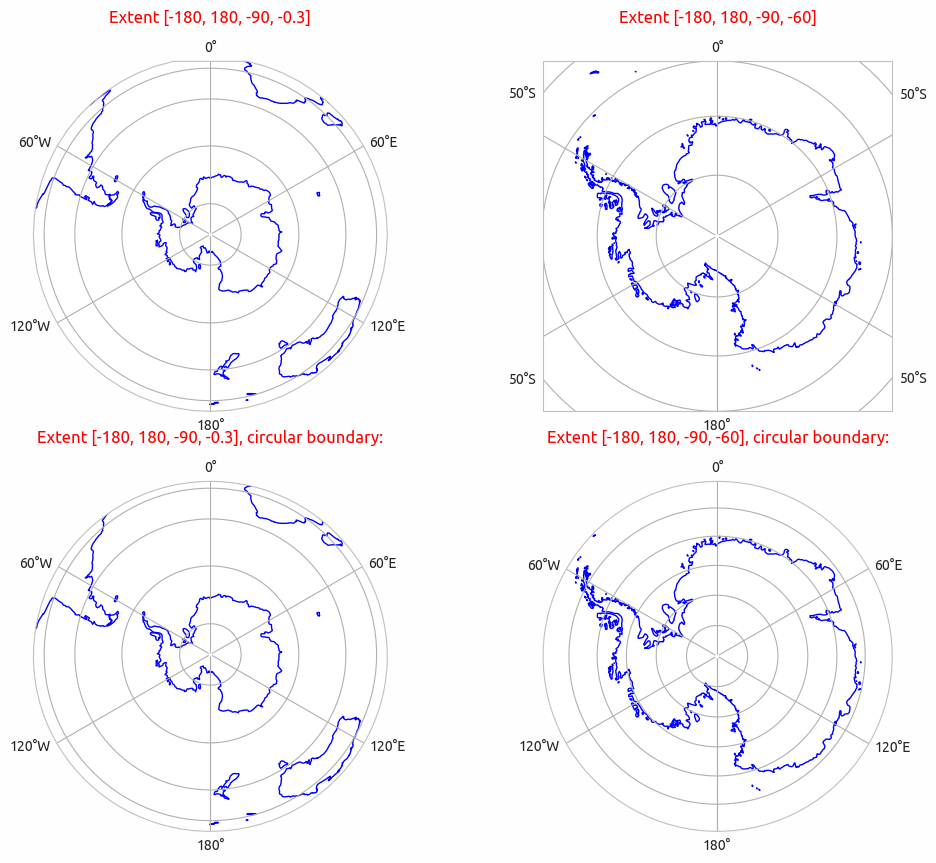

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath

# we are looking at the southern pole of the globe
projection = ccrs.Orthographic(central_latitude=-90, central_longitude=0)

# two extents we are going to work with
extent_big = [-180, 180, -90, -0.3] # max latitude doesn't seem to be able to go beyond -0.3 without destroying the plot
extent_small = [-180, 180, -90, -60]

fig=plt.figure(1, figsize=(12, 10))

# two top plots with different extents (left and right)
ax1 = fig.add_subplot(2, 2, 1, projection=projection)
ax1.set_extent(extent_big, crs=ccrs.PlateCarree())
ax1.coastlines(color='b')
ax1.gridlines(draw_labels=True)
ax1.set_title('Extent {}'.format(extent_big), color='r')

ax2 = fig.add_subplot(2, 2, 2, projection=projection)
ax2.set_extent(extent_small, crs=ccrs.PlateCarree())
ax2.coastlines(color='b')
ax2.gridlines(draw_labels=True)
ax2.set_title('Extent {}'.format(extent_small), color='r')

# make a circular map boundary in axes coordinates
theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

# two bottom plots with different extents (left and right) limited by the circular boundary
ax3 = fig.add_subplot(2, 2, 3, projection=projection)
ax3.set_boundary(circle, transform=ax3.transAxes)
ax3.set_extent(extent_big, crs=ccrs.PlateCarree())
ax3.coastlines(color='b')
ax3.gridlines(draw_labels=True)
ax3.set_title('Extent {}, circular boundary:'.format(extent_big), color='r')

ax4 = fig.add_subplot(2, 2, 4, projection=projection)
ax4.set_boundary(circle, transform=ax4.transAxes)
ax4.set_extent(extent_small, crs=ccrs.PlateCarree())
ax4.coastlines(color='b')
ax4.gridlines(draw_labels=True)
ax4.set_title('Extent {}, circular boundary:'.format(extent_small), color='r')

plt.show()

In [10]:
circle

Path(array([[5.00000000e-01, 1.00000000e+00],
       [5.31711960e-01, 9.98993338e-01],
       [5.63296227e-01, 9.95977406e-01],
       [5.94625622e-01, 9.90964349e-01],
       [6.25573994e-01, 9.83974351e-01],
       [6.56016723e-01, 9.75035559e-01],
       [6.85831228e-01, 9.64183967e-01],
       [7.14897456e-01, 9.51463269e-01],
       [7.43098368e-01, 9.36924689e-01],
       [7.70320409e-01, 9.20626766e-01],
       [7.96453965e-01, 9.02635129e-01],
       [8.21393805e-01, 8.83022222e-01],
       [8.45039506e-01, 8.61867019e-01],
       [8.67295854e-01, 8.39254706e-01],
       [8.88073232e-01, 8.15276334e-01],
       [9.07287976e-01, 7.90028455e-01],
       [9.24862715e-01, 7.63612734e-01],
       [9.40726682e-01, 7.36135537e-01],
       [9.54815998e-01, 7.07707507e-01],
       [9.67073930e-01, 6.78443111e-01],
       [9.77451121e-01, 6.48460188e-01],
       [9.85905784e-01, 6.17879468e-01],
       [9.92403877e-01, 5.86824089e-01],
       [9.96919232e-01, 5.55419100e-01],
       [9.9

In [11]:
import numpy as np
import matplotlib.path as mpath

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

fig.show()

/tmp/ipykernel_234352/2640410704.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


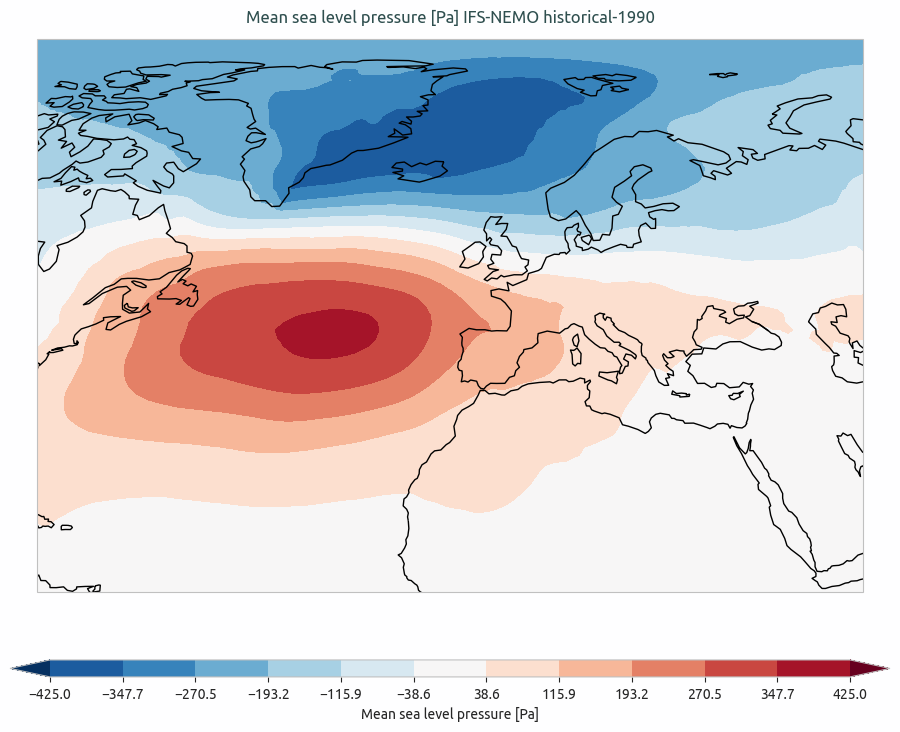

In [12]:
reg1.aqua.plot_single_map(sym=True, extent=[-70, 50, 10, 90])

In [13]:
nao.save_netcdf(nao.index,
                diagnostic='nao',
                diagnostic_product='index')

2025-05-01 13:38:39 :: OutputSaver :: DEBUG    -> Generated filename: nao.index.climatedt-phase1.IFS-NEMO.historical-1990.nc
2025-05-01 13:38:39 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-01 13:38:39 :: OutputSaver :: DEBUG    -> Metadata added: {'timestamp': '2025-05-01 13:38:39', 'aqua_version': '0.14.1-alpha', 'diagnostic': 'nao', 'model': 'IFS-NEMO', 'experiment': 'historical-1990', 'time_precision': 'ymd', 'catalog': 'climatedt-phase1', 'rebuild': 'True'}
2025-05-01 13:38:39 :: create_folder :: INFO     -> Folder ./netcdf already exists
2025-05-01 13:38:39 :: OutputSaver :: DEBUG    -> Metadata added: {'timestamp': '2025-05-01 13:38:39', 'aqua_version': '0.14.1-alpha', 'diagnostic': 'nao', 'model': 'IFS-NEMO', 'experiment': 'historical-1990', 'time_precision': 'ymd', 'catalog': 'climatedt-phase1', 'rebuild': 'True'}
2025-05-01 13:38:39 :: OutputSaver :: INFO     -> NetCDF file successfully saved.
2025-05-01 13:38:39 :: OutputSaver :: DEBUG    -> Saved n